<a href="https://colab.research.google.com/github/shleppich/zxc/blob/main/%D0%B6%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%D1%82%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

def create_holes(dataframe,  column_name, hole_percentage = 10):
    """
    Создает "дыры" в указанной колонке заданного DataFrame.

    Parameters:
        dataframe (pd.DataFrame): Исходный DataFrame.
        column_name (str): Имя колонки, в которой нужно создать "дыры".
        hole_percentage (float): Процент дырявости, который указывает, какую часть данных следует заменить на NaN.

    Returns:
        pd.DataFrame: DataFrame с "дырами" в указанной колонке.
    """
    if hole_percentage < 0 or hole_percentage > 100:
        raise ValueError("Процент дырявости должен быть в диапазоне от 0 до 100.")

    dataframe_with_holes = dataframe.copy()
    num_holes = int(len(dataframe) * (hole_percentage / 100))
    hole_indices = np.random.choice(len(dataframe), num_holes, replace=False)
    dataframe_with_holes.loc[hole_indices, column_name] = np.nan

    return dataframe_with_holes


# Example
# df = pd.read_csv('path/to/file')
# df = create_holes(df, 'column')

In [ ]:
import pandas as pd

df = pd.read_csv('student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
#Удаление
df = pd.read_csv('student-mat.csv')
df = create_holes(df, 'age')
df_cleaned = df.dropna()
df_cleaned

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16.0,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18.0,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
389,MS,F,18.0,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
#Заполнение при помощи медианы
df = pd.read_csv('student-mat.csv')
df = create_holes(df, 'age')
df_filled_median = df.fillna(df.median())
df_filled_median

<ipython-input-8-777355e5f7f4>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_median = df.fillna(df.median())


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
#Заполнение при помощи среднего
df = pd.read_csv('student-mat.csv')
df = create_holes(df, 'age')
df_filled_mean = df.fillna(df.mean())
df_filled_mean


<ipython-input-9-016b236137ff>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_mean = df.fillna(df.mean())


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.00000,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17.00000,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15.00000,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.00000,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.69382,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.00000,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17.00000,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,16.69382,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18.00000,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
#Заполнение при помощи моды
df = pd.read_csv('student-mat.csv')
df = create_holes(df, 'age')
df_filled_mode = df.fillna(df["age"].mode()[0])
df_filled_mode

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
#Заполнение при помощи интерполяции
df = pd.read_csv('student-mat.csv')
df = create_holes(df, 'age')
df_interpolated = df.interpolate()
df_interpolated

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,17.5,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


**Объясните**

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


In [ ]:
df = pd.read_csv('student-mat.csv')
df["age"].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

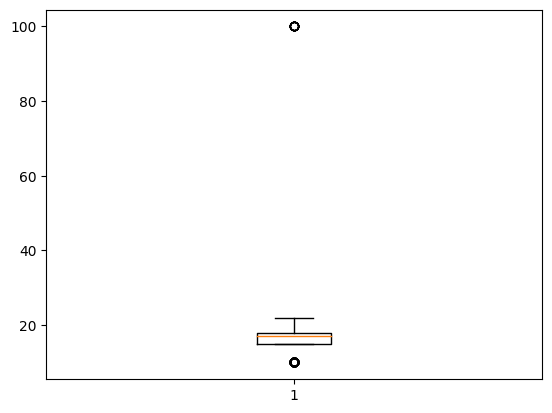

In [ ]:
#Методом среднего
# df = df.dropna()
# df.loc[0:10, "age"] = 100
# plt.boxplot(df["age"])
# plt.show()
# plt.show()

In [ ]:
#При помощи межквартильного размаха
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

df_filtered = remove_outliers(df, 'age')

df_filtered

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
101,GP,M,16,U,GT3,T,4,4,services,teacher,...,4,4,3,1,1,4,0,16,17,17
102,GP,M,15,U,GT3,T,4,4,services,other,...,5,3,3,1,1,5,4,10,13,14
103,GP,F,15,U,GT3,T,3,2,services,other,...,4,3,5,1,1,2,26,7,6,6
104,GP,M,15,U,GT3,A,3,4,services,other,...,5,4,4,1,1,1,0,16,18,18
105,GP,F,15,U,GT3,A,3,3,other,health,...,4,3,3,1,1,4,10,10,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
#Статистика и объяснение

mean = df["age"].mean()
std_deviation = df["age"].std()
threshold = 3 * std_deviation

# Идентифицируем выбросы
outliers = [x for x in df["age"] if abs(x - mean) > threshold]

# Выводим результаты
print("Среднее значение данных:", mean)
print("Стандартное отклонение данных:", std_deviation)
print("Потенциальные выбросы:", outliers)

Среднее значение данных: 16.696202531645568
Стандартное отклонение данных: 1.2760427246056283
Потенциальные выбросы: [22, 21]


**Объяснения**

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [ ]:
#Проверка на дубли
df_dub = df[df.duplicated()]
df_dub

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [ ]:
#создаем дубли
df = pd.concat((df, df.loc[0:100]))
df_dub = df[df.duplicated()]
df_dub

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,GP,M,16,R,GT3,T,4,3,services,other,...,3,3,3,1,1,4,2,11,15,15
97,GP,F,16,U,GT3,T,2,1,other,other,...,4,3,5,1,1,5,2,8,9,10
98,GP,F,16,U,GT3,T,4,4,other,other,...,5,3,4,1,2,1,6,11,14,14
99,GP,F,16,U,GT3,T,4,3,other,at_home,...,5,3,5,1,1,3,0,7,9,8


In [ ]:
#Удаление дублей
df = df.drop_duplicates()
df_no_dub = df[df.duplicated()]
df_no_dub

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [ ]:
df['G1'] = df['G1'].astype('category')
df['G2'] = df['G2'].astype('category')
df['G3'] = df['G3'].astype('category')
df['school'] = df['school'].astype('category')
df['age'] = df['age'].astype('category')
df['address'] = df['address'].astype('category')
df['famsize'] = df['famsize'].astype('category')
df['Pstatus'] = df['Pstatus'].astype('category')
df['Mjob'] = df['Mjob'].astype('category')
df['Fjob'] = df['Fjob'].astype('category')
df['reason'] = df['reason'].astype('category')
df['guardian'] = df['guardian'].astype('category')
df['schoolsup'] = df['schoolsup'].astype('category')
df['famsup'] = df['famsup'].astype('category')
df['paid'] = df['paid'].astype('category')
df['famsize'] = df['famsize'].astype('category')
df['activities'] = df['activities'].astype('category')
df['nursery'] = df['nursery'].astype('category')
df['higher'] = df['higher'].astype('category')
df['intrenet'] = df['internet'].astype('category')
df['romantic'] = df['romantic'].astype('category')

num_features = df.select_dtypes(include=['float64', 'int']).columns
num_features
df.absences.unique()

array([ 6,  4, 10,  2,  0, 16, 14,  7,  8, 25, 12, 54, 18, 26, 20, 56, 24,
       28,  5, 13, 15, 22,  3, 21,  1, 75, 30, 19,  9, 11, 38, 40, 23, 17])

In [ ]:
num_features

Index(['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')

In [ ]:
category_features = df.select_dtypes(include=['category']).columns
category_features

Index(['school', 'age', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'romantic', 'G1', 'G2', 'G3', 'intrenet'],
      dtype='object')

In [ ]:

for category in category_features:
  feature = df[category]
  dummy = pd.get_dummies(feature)
  for col in dummy.columns:
    df[f'{category}_{col}'] = dummy[col]
    # df = df.drop(category, axis=1)

df.to_csv('/content/out.csv')

<ipython-input-75-52412f15a192>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{category}_{col}'] = dummy[col]
<ipython-input-75-52412f15a192>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{category}_{col}'] = dummy[col]
<ipython-input-75-52412f15a192>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = 

Масштабируйте категориальные признаки через OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# Standard масштабирование
scaler_std = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_features] = scaler_std.fit_transform(df[num_features])




df_std_scaled.famsize.unique() # преобразованные уникальные значения в числовом призанке в диапозоне [0, 1]

array(['GT3', 'LE3'], dtype=object)

In [ ]:
df_std_scaled[num_features]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.592380,-0.685387,-0.479857,-0.643249,-0.042286,2.242901,1.178860,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975
391,0.238380,0.229234,-1.399970,0.792251,-1.235351,-0.449944,-2.171138,0.766399,1.700867,1.707469,1.328545,-1.119469,-0.338906
392,3.377047,-1.600009,-1.399970,-0.643249,-1.235351,3.589323,1.178860,1.768808,-0.097908,1.707469,0.551100,-0.399289,-0.338906
393,1.023046,0.229234,-0.479857,2.227751,-1.235351,-0.449944,0.062194,0.766399,-1.896683,1.707469,1.328545,1.041070,-0.714236


##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])